In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

In [2]:
wm = pd.read_csv(r'data\WineMatters.csv')
wm.head(10)

,WineID,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
0,1,65,265,White,0,0.0,Not Present,Aluminium,Single,0,...,2,4,2,3,3,0,0,6,6,4
1,2,47,2464,Red,310,305.0,Present,Aluminium,Single,4,...,0,2,2,3,4,0,0,8,6,4
2,3,15,2138,White,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
3,4,60,623,White,0,0.0,Not Present,Aluminium,Single,0,...,3,4,3,1,1,0,0,2,2,6
4,5,70,354,White,0,0.0,Not Present,Aluminium,Single,0,...,4,3,4,2,2,0,0,4,4,10
5,6,30,1894,Red,0,0.0,Not Present,Aluminium,Single,4,...,2,0,2,2,5,0,0,10,8,4
6,7,66,227,White,17,15.0,Not Present,Aluminium,Single,0,...,2,5,5,5,5,0,0,10,10,6
7,8,10,1812,Red,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
8,9,56,73,White,0,0.0,Present,Aluminium,Single,0,...,5,3,5,4,4,0,0,2,8,8
9,10,22,1556,Red,30,26.0,Not Present,Aluminium,Single,4,...,2,0,2,2,2,0,0,10,8,4


In [3]:
# Set WineID as an index
wm.set_index('WineID', inplace = True)

<b><font size="5">Duplicates</font><a class="anchor"><a id='toc'></a></b>

In [4]:
# Check if there are duplicate rows
wm[wm.duplicated(keep=False)]

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
WineID,,,,,,,,,,,,,,,,,,,,,
354,33,3384,White,0,0.0,Very Few,Aluminium,Single,5,5,...,1,0,1,1,3,0,4,8,8,2
354,33,3384,White,0,0.0,Very Few,Aluminium,Single,5,5,...,1,0,1,1,3,0,4,8,8,2


There are two rows that are duplicated.

In [5]:
# Drop dulicate rows and check again
wm.drop_duplicates(inplace = True)
wm[wm.duplicated(keep=False)]

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
WineID,,,,,,,,,,,,,,,,,,,,,


Now there are no more duplicated rows.

<b><font size="5">Coherence</font><a class="anchor"><a id='toc'></a></b>

In [6]:
# Check variable Cloudiness
wm['Cloudiness'].max()

6

In [7]:
# Redefine values that are higher than 5 to 5
wm.loc[wm['Cloudiness']>5,'Cloudiness']=5
wm['Cloudiness'].max()

5

In [8]:
# For safety reasons we did it for all variables
wm.loc[wm['Acidity']>5,'Acidity']=5
wm.loc[wm['Floral']>5,'Floral']=5
wm.loc[wm['Wood']>5,'Wood']=5
wm.loc[wm['Sweetness']>5,'Sweetness']=5
wm.loc[wm['Red_Fruit']>5,'Red_Fruit']=5
wm.loc[wm['Citric']>5,'Citric']=5
wm.loc[wm['Density']>5,'Density']=5
wm.loc[wm['Color_Intensity']>5,'Color_Intensity']=5
wm.loc[wm['Cloudiness']>5,'Cloudiness']=5
wm.loc[wm['Alcohol']>5,'Alcohol']=5
wm.loc[wm['Astringency']>5,'Astringency']=5

In [9]:
wm.loc[wm['Satisfaction_France']>10,'Satisfaction_France']=10
wm.loc[wm['Satisfaction_Spain']>10,'Satisfaction_Spain']=10
wm.loc[wm['Satisfaction_Portugal']>10,'Satisfaction_Portugal']=10

In [10]:
# Check the frequency of each level in variables Satisfaction_France, Satisfaction_Spain and Satisfaction_Portugal
wm['Satisfaction_France'].value_counts()

8     48240
10    35748
6     24485
4     13432
2      7975
Name: Satisfaction_France, dtype: int64

In [11]:
wm['Satisfaction_Spain'].value_counts()

8     48795
10    35916
6     23984
4     13412
2      7768
0         5
Name: Satisfaction_Spain, dtype: int64

In [12]:
wm['Satisfaction_Portugal'].value_counts()

8     35181
6     30780
10    29973
4     18573
2     15359
0        14
Name: Satisfaction_Portugal, dtype: int64

As we can see all numbers are even. Therefore for easier data handling we could change the scale to 0-5 instead of 0-10.

In [13]:
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(2,1)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(4,2)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(6,3)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(8,4)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(10,5)

In [14]:
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(2,1)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(4,2)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(6,3)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(8,4)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(10,5)

In [15]:
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(2,1)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(4,2)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(6,3)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(8,4)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(10,5)

<b><font size="5">Check Missing Values before Outliers</font><a class="anchor"><a id='toc'></a></b>

In [16]:
# Check sum of missing value per variable
wm.isna().sum()

Aging_Time                 0
Litters_Barrel             0
Type                       0
Magnesium                  0
Residual_Sugar           391
Sulphites                  0
Barrel                    56
Grapes                     8
Acidity                    0
Floral                     0
Wood                       0
Sweetness                  0
Red_Fruit                  0
Citric                     0
Density                    0
Color_Intensity            0
Cloudiness                 0
Alcohol                    0
Astringency                0
Satisfaction_France        0
Satisfaction_Spain         0
Satisfaction_Portugal      0
dtype: int64

<b><font size="5">Outliers</font><a class="anchor"><a id='toc'></a></b>

@ReportGroup: also check the notebook "Outliers last"

For outliers, we only check floats and integers who aren't in a scale because in a scale (especially only until 10, the outcome is based on personal factors). Of course, categorical variables also can't be checked on outliers.

So we are left with Aging_Time, Litters_Barrel, Magnesium and Residual_Sugar. For these we will gonna draw a boxplot.

<AxesSubplot:xlabel='Residual_Sugar'>

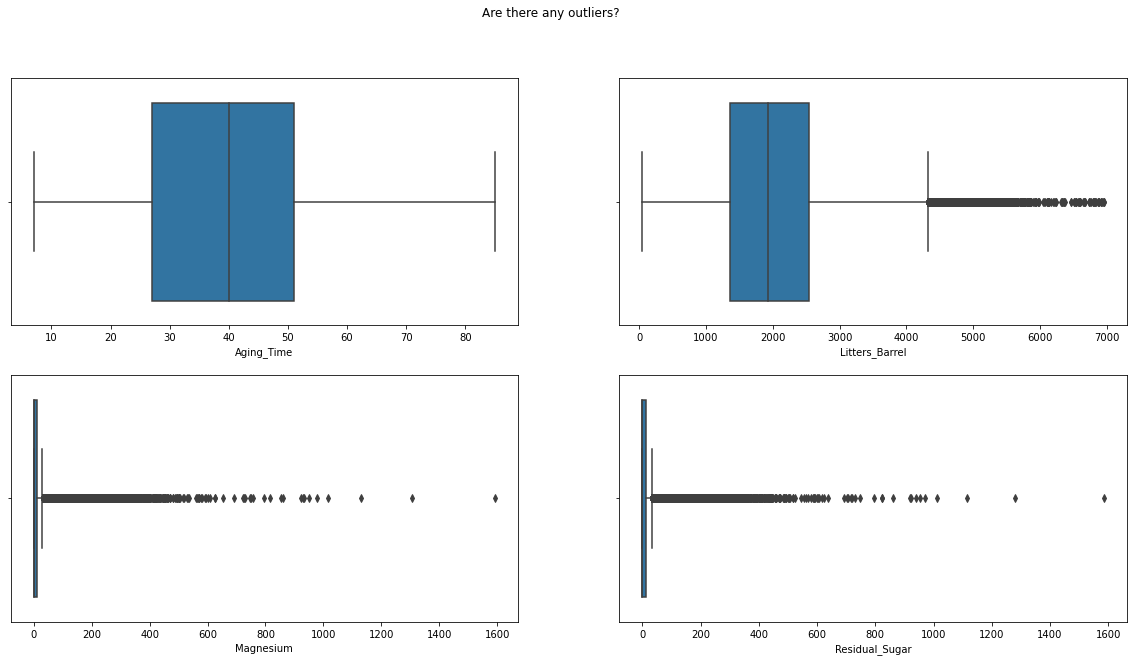

In [17]:
# Plotting a 2 rows X 2 columns plot showing all boxplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Headline for the 2 rows X 2 columns plot
fig.suptitle('Are there any outliers?')

# Defining all boxplots shown in the 6 rows X 3 columns plot
sns.boxplot(ax = axes[0,0], x='Aging_Time', data = wm)
sns.boxplot(ax=axes[0, 1], x='Litters_Barrel', data = wm)
sns.boxplot(ax=axes[1, 0], x='Magnesium', data = wm)
sns.boxplot(ax=axes[1, 1], x='Residual_Sugar', data = wm)

As we can see there are only outliers in Litters_Barrel, Magnesium and Residual_Sugar for which we will treat the outliers.

For a more detailed outlier treatment please check the notebook "Outliers last".

In [18]:
#Cleaning outliers Magnesium
wm_after_Magnesium=wm[wm['Magnesium'] < 440]
wm_after_Magnesium.shape

(129810, 22)

In [19]:
#Cleaning outliers Residual Sugar
wm_after_ResidualSugar=  wm_after_Magnesium[wm_after_Magnesium['Residual_Sugar'] < 450]
wm_after_ResidualSugar.shape

(129416, 22)

In [20]:
#Cleaning outliers Litters per Barrel
wm_after_outliers =  wm_after_ResidualSugar[wm_after_ResidualSugar['Litters_Barrel'] < 6420]
wm_after_outliers.shape

(129374, 22)

In [21]:
# Assign wm_after_outliers to wm_cleaned
wm_cleaned = wm_after_outliers

In [22]:
wm_cleaned.shape

(129374, 22)

<b><font size="5">Missing Values</font><a class="anchor"><a id='toc'></a></b>

Use median not mode

In [23]:
# Check sum of missing value per variable
wm_cleaned.isna().sum()

Aging_Time                0
Litters_Barrel            0
Type                      0
Magnesium                 0
Residual_Sugar            0
Sulphites                 0
Barrel                   56
Grapes                    8
Acidity                   0
Floral                    0
Wood                      0
Sweetness                 0
Red_Fruit                 0
Citric                    0
Density                   0
Color_Intensity           0
Cloudiness                0
Alcohol                   0
Astringency               0
Satisfaction_France       0
Satisfaction_Spain        0
Satisfaction_Portugal     0
dtype: int64

We have missing values for Barrel and Grapes.

The missing values for the outliers were deleted when the outliers were deleted (for example there were 391 missing values in Sulphites).

Barrel and Grapes are both categorical variables. Because the missing values in the categorical variables are less than 3% of all values we can drop them.

In [24]:
# Remove missing values from categorical variables
wm_cleaned = wm_cleaned.dropna(axis = 0, how ='any')

In [25]:
# Checking sum of missing value per variable after treatment of Barrel and Grapes
wm_cleaned.isna().sum()

Aging_Time               0
Litters_Barrel           0
Type                     0
Magnesium                0
Residual_Sugar           0
Sulphites                0
Barrel                   0
Grapes                   0
Acidity                  0
Floral                   0
Wood                     0
Sweetness                0
Red_Fruit                0
Citric                   0
Density                  0
Color_Intensity          0
Cloudiness               0
Alcohol                  0
Astringency              0
Satisfaction_France      0
Satisfaction_Spain       0
Satisfaction_Portugal    0
dtype: int64

In [26]:
wm_cleaned.shape

(129310, 22)

As we can see with cleaned shape the 64 rows (129374 - 129310 = 64) with missing values got dropped.

<b><font size="5">Treating Categorical values (Dummies)</font><a class="anchor"><a id='toc'></a></b>

By checking the frequency of each level in categorical variable Sulphites we found out that there are the four variables:
- Present        
- Not Present    
- Very Few       
- 0

For easier data handling, a new variable will be created and used instead. Sulphites will be converted into a binary variable where Sulphites Presence (Present and Very Few) is indicated by 1 or else 0 (Not Presen and 0).

In [27]:
# Create new variable Sulphites-Presence
wm_cleaned['Sulphites_Presence'] = np.where((wm_cleaned['Sulphites']=='Very Few')|
                                    (wm_cleaned['Sulphites']=='Present'),1,0)

# Drop old variable Sulphites
wm_cleaned.drop(labels = ['Sulphites'], axis = 1, inplace = True)

All the others categorical variables only have two variables, so we identify one of them to be the main one.

In [28]:
# Create new variable Type_White
wm_cleaned['Type_White'] = np.where((wm_cleaned['Type']=='White'),1,0)

# Drop old variable Type
wm_cleaned.drop(labels = ['Type'], axis = 1, inplace = True)

In [29]:
# Create new variable Barrel_Wooden
wm_cleaned['Barrel_Wooden'] = np.where((wm_cleaned['Barrel']=='Wooden'),1,0)

# Drop old variable Barrel
wm_cleaned.drop(labels = ['Barrel'], axis = 1, inplace = True)

In [30]:
# Create new variable Grapes_Single
wm_cleaned['Grapes_Single'] = np.where((wm_cleaned['Grapes']=='Single'),1,0)

# Drop old variable Grapes
wm_cleaned.drop(labels = ['Grapes'], axis = 1, inplace = True)

In [31]:
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,3,0,0,3,3,2,0,1,0,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,4,0,0,4,3,2,1,0,0,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,3,0,0,4,4,2,0,1,0,1
4,60,623,0,0.0,0,4,0,3,3,4,...,1,0,0,1,1,3,0,1,0,1
5,70,354,0,0.0,0,4,0,3,4,3,...,2,0,0,2,2,5,0,1,0,1


<b><font size="5">Scale</font><a class="anchor"><a id='toc'></a></b>

In [32]:
wm_scaled = wm_cleaned.copy()

In [33]:
# Create a new dataset named finalDatathat will contain the columns from wm.
finalData = wm_scaled[['Aging_Time', 'Litters_Barrel', 'Magnesium', 'Residual_Sugar']]

In [34]:
# Create an instance of MinMaxScaler() named minmax_scaler.
minmax_scaler = MinMaxScaler()

In [35]:
# Use the .fit()method of minmax_scaler to fit the scaler to finalData and assign the results to the object scale
scale = minmax_scaler.fit(finalData)

In [36]:
# Use the .transform() method of scale to apply MinMaxScaler to finalData and assign it to the object minmax_data.
minmax_data = scale.transform(finalData)

In [37]:
# Create a new dataset named minmax_data that will contain the command : pd.DataFrame(minmax_data, columns = finalData.columns).

minmax_data = pd.DataFrame(minmax_data, columns = finalData.columns)
minmax_data.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar
0,0.743590,0.034003,0.000000,0.000000
1,0.512821,0.381781,0.707763,0.693182
2,0.102564,0.330223,0.000000,0.000000
3,0.679487,0.090622,0.000000,0.000000
4,0.807692,0.048078,0.000000,0.000000


In [38]:
# Drop old unscaled columns Aging_Time, Litters_Barrel, Magnesium and Residual_Sugar
wm_scaled.pop('Aging_Time')
wm_scaled.pop('Litters_Barrel')
wm_scaled.pop('Magnesium')
wm_scaled.pop('Residual_Sugar')

WineID
1           0.0
2         305.0
3           0.0
4           0.0
5           0.0
          ...  
129876      0.0
129877    172.0
129878    163.0
129879    205.0
129880    186.0
Name: Residual_Sugar, Length: 129310, dtype: float64

In [39]:
# Change start index to 1 to join dataframes minmax_data and wm_cleaned
minmax_data.index += 1 
wm_scaled = minmax_data.join(wm_scaled)

In [40]:
wm_scaled.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
1,0.743590,0.034003,0.000000,0.000000,0.0,5.0,0.0,2.0,2.0,4.0,...,3.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0
2,0.512821,0.381781,0.707763,0.693182,4.0,2.0,0.0,3.0,0.0,2.0,...,4.0,0.0,0.0,4.0,3.0,2.0,1.0,0.0,0.0,1.0
3,0.102564,0.330223,0.000000,0.000000,3.0,4.0,0.0,3.0,2.0,0.0,...,3.0,0.0,0.0,4.0,4.0,2.0,0.0,1.0,0.0,1.0
4,0.679487,0.090622,0.000000,0.000000,0.0,4.0,0.0,3.0,3.0,4.0,...,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0
5,0.807692,0.048078,0.000000,0.000000,0.0,4.0,0.0,3.0,4.0,3.0,...,2.0,0.0,0.0,2.0,2.0,5.0,0.0,1.0,0.0,1.0


<b><font size="5">Create new Variables</font><a class="anchor"><a id='toc'></a></b>

To see if customers overall like the wine, we gonna create a new variable Satisfaction_General. 

For that, we are going to calculate the average over the three countries.

If it is higher than 5 (3-5), it will be declared as a good wine (indicate as 1).
If it is equal or less than 5 (0-2), it will be declared as a bad wine (indicate as 0).

In [41]:
# Get values and calculate average
avgS = (wm_cleaned['Satisfaction_France'] + wm_cleaned['Satisfaction_Spain'] + wm_cleaned['Satisfaction_Portugal'])/3

# Create a list to store in 0s and 1s
winerate = []

#Loop to append values after if statement
for avg in avgS:
    if (avg > 2):
        wr = 1
        winerate.append(wr)
    else:
        wr = 0
        winerate.append(wr)

#Add column with winerate values
wm_cleaned['Satisfaction_General'] = winerate

wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,0,3,3,2,0,1,0,1,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,0,4,3,2,1,0,0,1,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,0,4,4,2,0,1,0,1,1
4,60,623,0,0.0,0,4,0,3,3,4,...,0,0,1,1,3,0,1,0,1,0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,0,2,2,5,0,1,0,1,1


In [42]:
wm_cleaned['Satisfaction_General'].value_counts()

1    120971
0      8339
Name: Satisfaction_General, dtype: int64

As we can see 8894 wines are seen as bad by the average satisfaction rate.

<b><font size="5">Correlations</font><a class="anchor"><a id='toc'></a></b>

<AxesSubplot:>

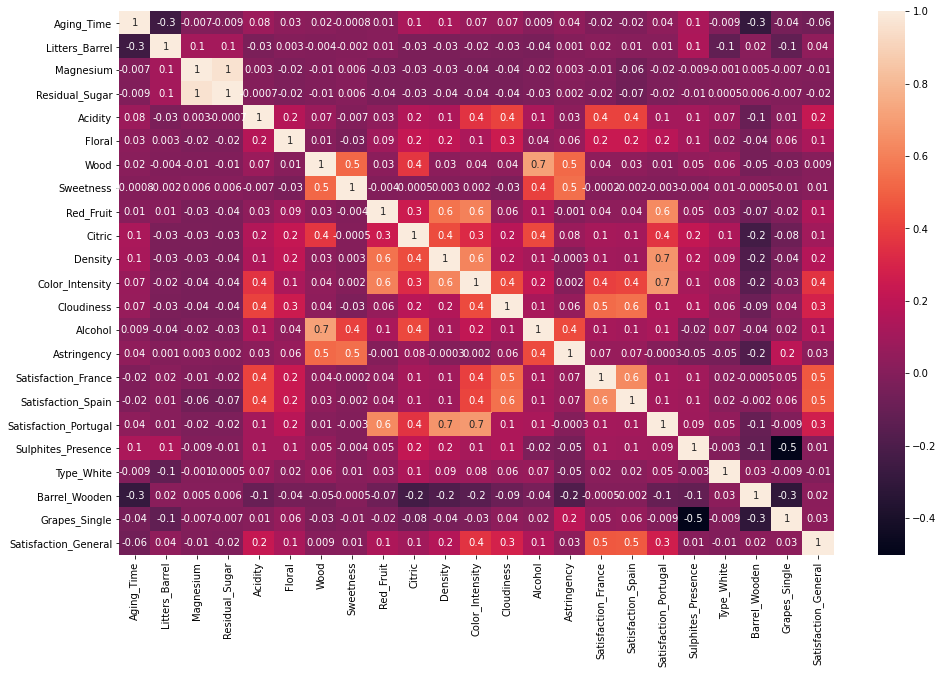

In [43]:
# Create new dataframe for correlations
wm_corr = wm_cleaned.copy()
# Create new dataframe named corr with the correlation between the variables, using the corr()method
corr = wm_corr.corr()
# Create a figure 
figure = plt.figure(figsize=(16,10))
# Create a heatmap plot
sns.heatmap(data = corr, annot=True, fmt = '.1g')

<b><font size="5">Segmentation of the Variables</font><a class="anchor"><a id='toc'></a></b>

There are two segmentation which will be used from now on:
- flavor/ feeling
- production characteristics

In [44]:
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,0,3,3,2,0,1,0,1,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,0,4,3,2,1,0,0,1,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,0,4,4,2,0,1,0,1,1
4,60,623,0,0.0,0,4,0,3,3,4,...,0,0,1,1,3,0,1,0,1,0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,0,2,2,5,0,1,0,1,1


In [45]:
# Definition of flavor/ feeling segmentation in wm_flavfeel
wm_flavfeel = wm_cleaned[['Residual_Sugar', 'Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency']].copy()

In [46]:
# Definition of production characteristics segmentation in wm_prodchar
wm_prodchar = wm_cleaned[['Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity']].copy()

<b><font size="5">K-Means - wm_flavfeel</font><a class="anchor"><a id='toc'></a></b>

<b><font size="4">wm_flavfeel - Elbow Method</font><a class="anchor"><a id='toc'></a></b>

In [47]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(wm_flavfeel)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

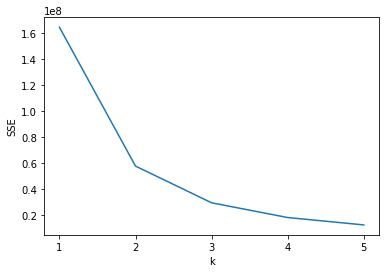

In [48]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

You can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

<b><font size="4">wm_flavfeel - Dendogram</font><a class="anchor"><a id='toc'></a></b>

In [49]:
#hclustering = linkage(wm_flavfeel, 'single') # nearest point
#hclustering = linkage(wm_flavfeel, 'complete') # most far away point
#hclustering = linkage(wm_flavfeel, 'average') # centroid
#hclustering = linkage(wm_flavfeel, 'ward') # common method

The dendogram method can't be executed due its big nature (reason for the error). That is why we will only use the Elbow Method.

<b><font size="4">wm_flavfeel - Apply K-Means</font><a class="anchor"><a id='toc'></a></b>

In [50]:
model = KMeans(n_clusters=3)

In [51]:
model.fit(wm_flavfeel)

KMeans(n_clusters=3)

In [52]:
wm_flavfeel['label'] = model.labels_
wm_flavfeel

,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency,label
WineID,,,,,,,,,,,,
1,0.0,0,5,0,2,2,4,2,3,0,0,0
2,305.0,4,2,0,3,0,2,2,4,0,0,2
3,0.0,3,4,0,3,2,0,2,3,0,0,0
4,0.0,0,4,0,3,3,4,3,1,0,0,0
5,0.0,0,4,0,3,4,3,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129876,0.0,3,4,5,3,2,5,2,3,5,5,0
129877,172.0,3,1,2,4,2,1,1,2,2,3,2
129878,163.0,3,2,3,3,3,2,2,4,3,0,2


<b><font size="4">wm_flavfeel - Exploring Results</font><a class="anchor"><a id='toc'></a></b>

In [53]:
descr = wm_flavfeel.reset_index(drop=True)
descr = descr.groupby(['label']).describe().transpose()
descr

label                             0             1            2
Residual_Sugar count  113216.000000  13496.000000  2598.000000
               mean        4.442967     65.879816   198.600462
               std         8.158549     25.276224    64.074896
               min         0.000000     36.000000   133.000000
               25%         0.000000     45.000000   151.000000
...                             ...           ...          ...
Astringency    min         0.000000      0.000000     0.000000
               25%         2.000000      2.000000     2.000000
               50%         3.000000      3.000000     3.000000
               75%         4.000000      4.000000     4.000000
               max         5.000000      5.000000     5.000000

[88 rows x 3 columns]

The distribution of the clusters are not similar (i.e. 112825 to 138181 to 2667). Remember that every time we do the clustering there could be new counts.

<b><font size="4">wm_flavfeel - Visualizing Results with histograms</font><a class="anchor"><a id='toc'></a></b>

In [54]:
cluster0 = wm_flavfeel[wm_flavfeel.label==0]
cluster1 = wm_flavfeel[wm_flavfeel.label==1]
cluster2 = wm_flavfeel[wm_flavfeel.label==2]

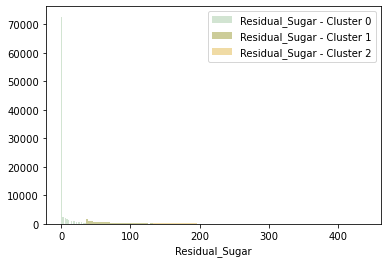

In [55]:
sns.distplot(cluster0['Residual_Sugar'],color='darkseagreen',label='Residual_Sugar - Cluster 0', kde = False)
sns.distplot(cluster1['Residual_Sugar'],color='olive',label='Residual_Sugar - Cluster 1', kde = False)
sns.distplot(cluster2['Residual_Sugar'],color='goldenrod',label='Residual_Sugar - Cluster 2', kde = False)
plt.legend()

As we can see here there are a lot of values that are near zero (more than 70000). That explains the one big cluster and the other relative smaller clusters. 

To see the distribution better we crop the graph and max it out at 1400.

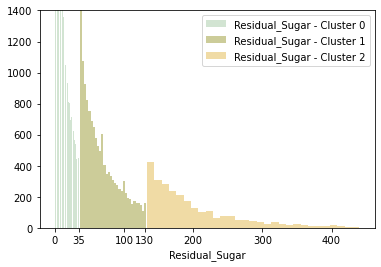

In [56]:
sns.distplot(cluster0['Residual_Sugar'],color='darkseagreen',label='Residual_Sugar - Cluster 0', kde = False)
sns.distplot(cluster1['Residual_Sugar'],color='olive',label='Residual_Sugar - Cluster 1', kde = False)
sns.distplot(cluster2['Residual_Sugar'],color='goldenrod',label='Residual_Sugar - Cluster 2', kde = False)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
plt.xticks([0, 35, 100, 130, 200, 300, 400])
plt.ylim(0, 1400)
plt.legend()

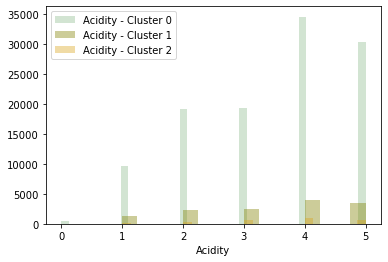

In [57]:
sns.distplot(cluster0['Acidity'],color='darkseagreen',label='Acidity - Cluster 0', kde = False)
sns.distplot(cluster1['Acidity'],color='olive',label='Acidity - Cluster 1', kde = False)
sns.distplot(cluster2['Acidity'],color='goldenrod',label='Acidity - Cluster 2', kde = False)
plt.legend()

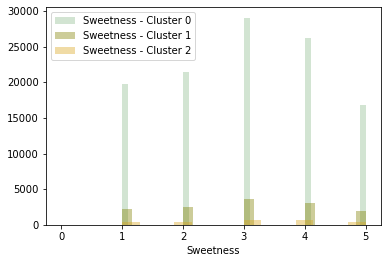

In [58]:
sns.distplot(cluster0['Sweetness'],color='darkseagreen',label='Sweetness - Cluster 0', kde = False)
sns.distplot(cluster1['Sweetness'],color='olive',label='Sweetness - Cluster 1', kde = False)
sns.distplot(cluster2['Sweetness'],color='goldenrod',label='Sweetness - Cluster 2', kde = False)
plt.legend()

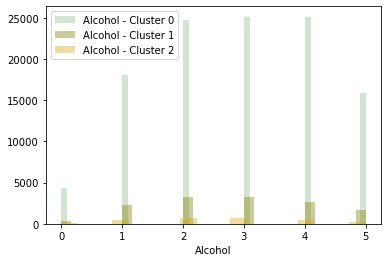

In [59]:
sns.distplot(cluster0['Alcohol'],color='darkseagreen',label='Alcohol - Cluster 0', kde = False)
sns.distplot(cluster1['Alcohol'],color='olive',label='Alcohol - Cluster 1', kde = False)
sns.distplot(cluster2['Alcohol'],color='goldenrod',label='Alcohol - Cluster 2', kde = False)
plt.legend()

In [60]:
wm_flavfeel['Residual_Sugar'].value_counts()

0.0      72692
1.0       2747
2.0       2585
3.0       2438
4.0       2371
         ...  
420.0        1
418.0        1
344.0        1
269.0        1
353.0        1
Name: Residual_Sugar, Length: 409, dtype: int64

Because all variables except Residual Sugar are on a scale from 0-5, Residual Sugar has the most influence on the clustering because of it overwhelming number of  values close to 0 and below 35.

<b><font size="4">wm_flavfeel - Visualizing Results with scatter-plots</font><a class="anchor"><a id='toc'></a></b>

In [61]:
# Obtaining coordinates of the centroids 
centroids = model.cluster_centers_
centroids

array([[  4.44296743,   3.48945379,   3.35237069,   2.85825325,
          2.98827904,   3.26256889,   3.39946651,   3.53470358,
          3.48162804,   2.85030384,   2.99088468],
       [ 65.87981624,   3.42612626,   3.26022525,   2.83246888,
          3.00407528,   3.19546532,   3.29001186,   3.45102253,
          3.37774155,   2.77771191,   2.96813871],
       [198.60046189,   3.63972286,   3.2517321 ,   2.70900693,
          3.01578137,   2.96343341,   3.20207852,   3.2517321 ,
          3.21632025,   2.67205543,   3.05542725]])

In [62]:
# Extracting individual values to plot in a scatter plot
centroid_0_Residual_Sugar = centroids[0,6]
centroid_1_Residual_Sugar = centroids[1,6]
centroid_2_Residual_Sugar = centroids[2,6]
centroid_0_Astringency = centroids[0,7]
centroid_1_Astringency = centroids[1,7]
centroid_2_Astringency = centroids[2,7]

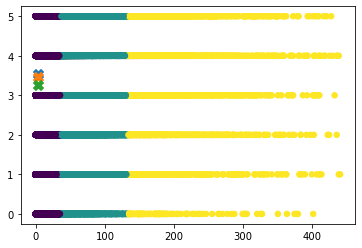

In [63]:
plt.scatter(wm_flavfeel.Residual_Sugar, wm_flavfeel.Astringency, c=wm_flavfeel.label, s=30)
plt.scatter(centroid_0_Residual_Sugar, centroid_0_Astringency, marker='X', s=100)
plt.scatter(centroid_1_Residual_Sugar, centroid_1_Astringency, marker='X', s=100)
plt.scatter(centroid_2_Residual_Sugar, centroid_2_Astringency, marker='X', s=100)
plt.show()

For all relationships between the variables with Residual_Sugar the centroid are always in the first big cluster.

Therefore, there are no semantic grouping and so the scatter-plot is not a good graph to use here. 

<b><font size="5">K-Means - wm_prodchar</font><a class="anchor"><a id='toc'></a></b>

<b><font size="4">wm_prodchar - Elbow Method</font><a class="anchor"><a id='toc'></a></b>

In [64]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(wm_prodchar)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

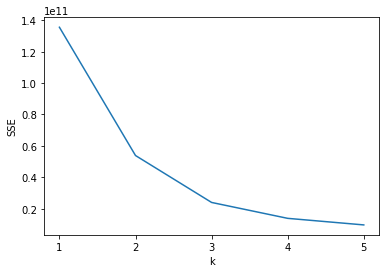

In [65]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

You can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

We also don't use the the dendogram method here because it can't be executed due its big nature (reason for the error). That is why we will only use the Elbow Method.

<b><font size="4">wm_prodchar - Apply K-Means</font><a class="anchor"><a id='toc'></a></b>

In [66]:
model = KMeans(n_clusters=3)

In [67]:
model.fit(wm_prodchar)

KMeans(n_clusters=3)

In [68]:
wm_prodchar['label'] = model.labels_
wm_prodchar

,Aging_Time,Litters_Barrel,Type_White,Magnesium,Sulphites_Presence,Barrel_Wooden,Grapes_Single,Color_Intensity,label
WineID,,,,,,,,,
1,65,265,1,0,0,0,1,3,2
2,47,2464,0,310,1,0,1,3,0
3,15,2138,1,0,0,0,1,2,0
4,60,623,1,0,0,0,1,1,2
5,70,354,1,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...
129876,29,1731,1,0,0,1,1,2,0
129877,63,2087,0,174,1,1,1,3,0
129878,69,2320,0,155,0,1,1,4,0


<b><font size="4">wm_prodchar - Exploring Results</font><a class="anchor"><a id='toc'></a></b>

In [69]:
descr = wm_prodchar.reset_index(drop=True)
descr = descr.groupby(['label']).describe().transpose()
descr

label                             0             1             2
Aging_Time      count  71830.000000  24851.000000  32629.000000
                mean      36.461395     37.508310     47.428453
                std       15.060656     14.275926     12.837908
                min        7.000000      7.000000      7.000000
                25%       25.000000     27.000000     40.000000
...                             ...           ...           ...
Color_Intensity min        0.000000      0.000000      0.000000
                25%        2.000000      3.000000      3.000000
                50%        4.000000      4.000000      4.000000
                75%        4.000000      5.000000      5.000000
                max        5.000000      5.000000      5.000000

[64 rows x 3 columns]

The distribution for wm_prodchar is fairly even compared to wm_flavfeel. 

Cluster 0 is the biggest with more than doubled the amount to the next biggest cluster.

<b><font size="4">wm_prodchar - Visualizing Results with histograms</font><a class="anchor"><a id='toc'></a></b>

In [70]:
cluster0 = wm_prodchar[wm_prodchar.label==0]
cluster1 = wm_prodchar[wm_prodchar.label==1]
cluster2 = wm_prodchar[wm_prodchar.label==2]

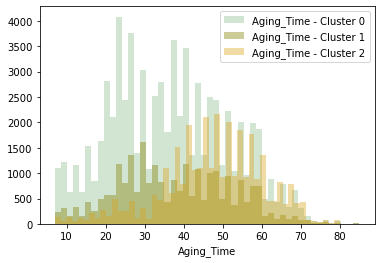

In [81]:
sns.distplot(cluster0['Aging_Time'],color='darkseagreen',label='Aging_Time - Cluster 0', kde = False)
sns.distplot(cluster1['Aging_Time'],color='olive',label='Aging_Time - Cluster 1', kde = False)
sns.distplot(cluster2['Aging_Time'],color='goldenrod',label='Aging_Time - Cluster 2', kde = False)
plt.legend()

Cluster 0 doesn't have that long of an Aging Time, while Cluster 2 has a longer Aging Time than the other clusters.

<b><font size="7">Check Litters_Barrel again!!</font><a class="anchor"><a id='toc'></a></b>

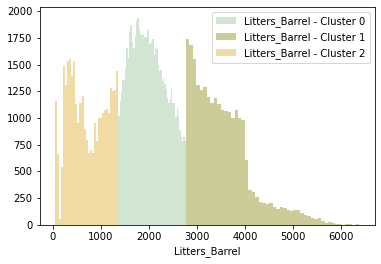

In [72]:
sns.distplot(cluster0['Litters_Barrel'],color='darkseagreen',label='Litters_Barrel - Cluster 0', kde = False)
sns.distplot(cluster1['Litters_Barrel'],color='olive',label='Litters_Barrel - Cluster 1', kde = False)
sns.distplot(cluster2['Litters_Barrel'],color='goldenrod',label='Litters_Barrel - Cluster 2', kde = False)
plt.legend()

The variable Litters_Barrel is perfectly distributed. That can be an indication that Litters_Barrel influenced the clustering the most.

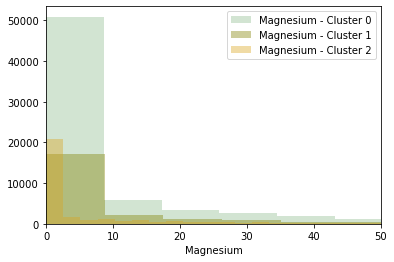

In [73]:
sns.distplot(cluster0['Magnesium'],color='darkseagreen',label='Magnesium - Cluster 0', kde = False)
sns.distplot(cluster1['Magnesium'],color='olive',label='Magnesium - Cluster 1', kde = False)
sns.distplot(cluster2['Magnesium'],color='goldenrod',label='Magnesium - Cluster 2', kde = False)
plt.xlim(0, 50)
plt.legend()

For Cluster 0 and 1 most of the values are up to 10, while 

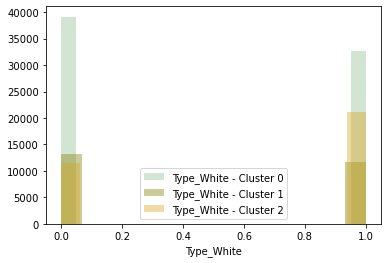

In [74]:
sns.distplot(cluster0['Type_White'],color='darkseagreen',label='Type_White - Cluster 0', kde = False)
sns.distplot(cluster1['Type_White'],color='olive',label='Type_White - Cluster 1', kde = False)
sns.distplot(cluster2['Type_White'],color='goldenrod',label='Type_White - Cluster 2', kde = False)
plt.legend()

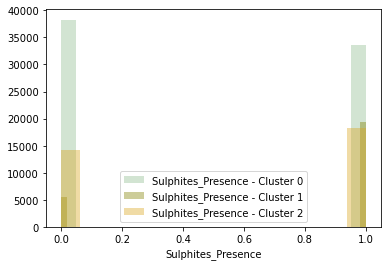

In [75]:
sns.distplot(cluster0['Sulphites_Presence'],color='darkseagreen',label='Sulphites_Presence - Cluster 0', kde = False)
sns.distplot(cluster1['Sulphites_Presence'],color='olive',label='Sulphites_Presence - Cluster 1', kde = False)
sns.distplot(cluster2['Sulphites_Presence'],color='goldenrod',label='Sulphites_Presence - Cluster 2', kde = False)
plt.legend()

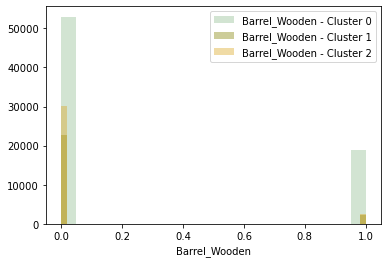

In [76]:
sns.distplot(cluster0['Barrel_Wooden'],color='darkseagreen',label='Barrel_Wooden - Cluster 0', kde = False)
sns.distplot(cluster1['Barrel_Wooden'],color='olive',label='Barrel_Wooden - Cluster 1', kde = False)
sns.distplot(cluster2['Barrel_Wooden'],color='goldenrod',label='Barrel_Wooden - Cluster 2', kde = False)
plt.legend()

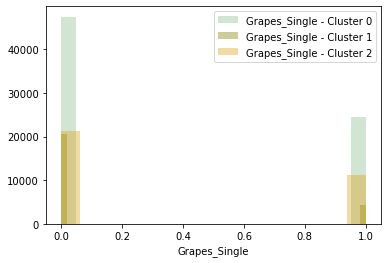

In [79]:
sns.distplot(cluster0['Grapes_Single'],color='darkseagreen',label='Grapes_Single - Cluster 0', kde = False)
sns.distplot(cluster1['Grapes_Single'],color='olive',label='Grapes_Single - Cluster 1', kde = False)
sns.distplot(cluster2['Grapes_Single'],color='goldenrod',label='Grapes_Single - Cluster 2', kde = False)
plt.legend()

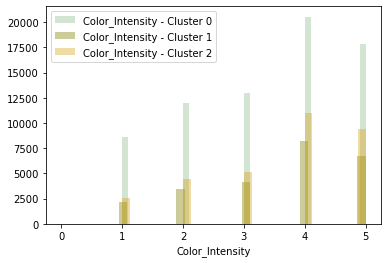

In [78]:
sns.distplot(cluster0['Color_Intensity'],color='darkseagreen',label='Color_Intensity - Cluster 0', kde = False)
sns.distplot(cluster1['Color_Intensity'],color='olive',label='Color_Intensity - Cluster 1', kde = False)
sns.distplot(cluster2['Color_Intensity'],color='goldenrod',label='Color_Intensity - Cluster 2', kde = False)
plt.legend()